<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
import numpy as np      
import pandas as pd     

import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from pandas_profiling import ProfileReport

import datetime

In [2]:
# YOUR CODE HERE

import pandas as pd
df_past = pd.read_csv( '../dat/past.csv.gz' )
print(df_past.columns)
display(df_past)

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000
1,5647110,5.326529e+08,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,...,0.250000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000
2,5790472,4.578109e+08,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000
3,5811598,4.612641e+08,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,...,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000
4,5846363,5.157993e+08,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,...,0.250000,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000


In [3]:
df_past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

In [4]:

'''
Pandas Profiling Report
 - Run a subset of the column to avoid the profiler getting overwhelmed
 - Takes < 2minutes when dropping columns
'''

print('\nPandas Profiling Report\n')
print(f'Started {datetime.datetime.now()}')
profile = ProfileReport( df_past.drop(columns=['Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
                                                '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
                                                'EarlyMorning', 'Evening', 'Morning', 'Night', 'Noon']) 
                        , title="Pandas Profiling Report")
profile.to_widgets()
print(f'Ended   {datetime.datetime.now()}')



Pandas Profiling Report

Started 2023-02-10 19:47:27.205445


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/wildfell/miniconda3/envs/sentiment_analysis/lib/python3.8/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Ended   2023-02-10 19:48:48.732675


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [5]:
# YOUR CODE HERE
percentage_purchase = 100 * df_past['Purchased?'].sum() / len(df_past)
print(f'Percentage of purchases: {percentage_purchase}%')

print('Unique Purchase Outcomes:')
print(df_past['Purchased?'].unique())

Percentage of purchases: 34.38%
Unique Purchase Outcomes:
[0 1]


Window Shoppers Definition: You look at items but you don't purchase.
Total Data Size: 5000


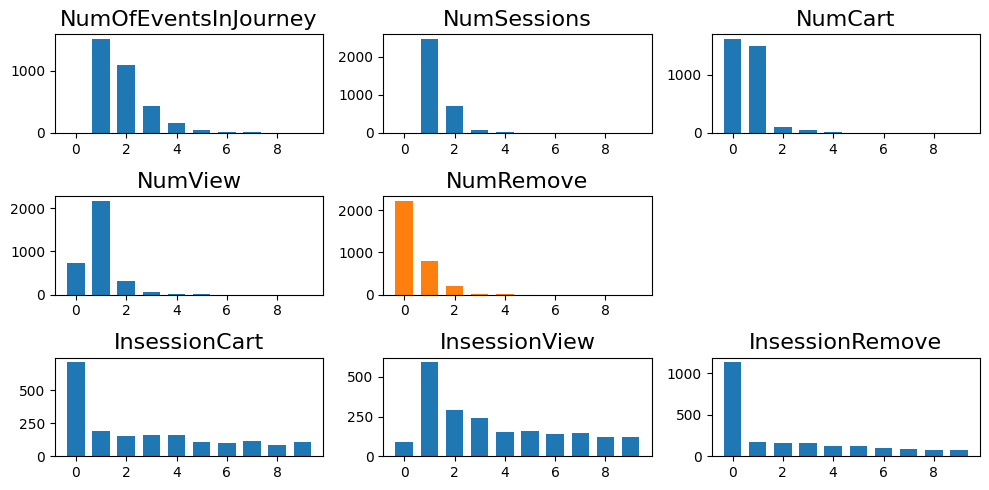

In [6]:
print('Window Shoppers Definition: You look at items but you don\'t purchase.')
print(f'Total Data Size: {len(df_past)}')

cols_of_interst = ['NumOfEventsInJourney','NumSessions','NumCart','NumView',
    'NumRemove','NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove']
plt.figure(figsize=(10,5))
for col_i in cols_of_interst:
    plt.subplot(3,3, cols_of_interst.index(col_i)+1 )
    plt.hist( df_past[df_past['Purchased?'] ==0][col_i] , np.arange(-.5,10.5,1), rwidth = .7)
    plt.title( col_i , fontsize=16)
plt.tight_layout()

### Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?

- About 1/3 of people purchase. So clearly they were not window shopping.
- Looking at InsessionCart and Insession Remove (of the people who do not purchase) about half will still put atleast 1 item in thier cart. This means that they were probably not window shopping either.
- That leaves about 1/3 of people who might have been window shopping.
- However, many people who did not purchase only looked at one 1 (In session view.) So these people might not have been window shopping either, they just came for a sepcific purpose and balked at the intended item.

### From the perspective of classification, is the data balanced?
- Definitely not balanced. Customers are much less likely to buy vs not buy.

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [7]:
# YOUR CODE HERE
X = df_past.drop(columns=['product_id' , 'user_id']).copy(deep=True)
# YOUR CODE HERE
y = X.pop('Purchased?')

In [8]:
# Quick check
(y != df_past['Purchased?']).sum()

0

In [9]:
assert np.all(y== df_past['Purchased?'])

In [10]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [11]:
len(X.columns)

34

In [12]:
from sklearn import preprocessing

# scaling
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.shape)

# 5 PCs: Fit_transform approach
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled) # equivalent to top two lines
print(X_reduced.shape)
display( X_reduced )

assert X_reduced.shape == (5000, 5)

(5000, 34)
(5000, 5)


array([[ 0.56666766, -1.68648068,  1.07802667, -0.05131363,  0.82715913],
       [ 0.4560092 ,  0.01321793, -0.57933535,  0.06390001,  0.24030944],
       [-0.16596919, -1.14865633, -0.51651899, -0.36468147, -0.85259612],
       ...,
       [ 2.13406084, -2.35354341, -1.00824603, -0.6131663 ,  0.88731158],
       [ 2.47177667, -1.94547517, -0.99235091,  0.28970645,  1.32347909],
       [-2.44376949,  0.34302232,  0.0866966 , -0.30490195,  0.84835297]])

In [13]:
# All PCs: Fit_transform approach
pca = PCA()
X_reduced = pca.fit_transform(X_scaled) # equivalent to top two lines
print(X_reduced.shape)
display( X_reduced[0:2,:] )

# assert X_reduced.shape == (5000, 5)

(5000, 34)


array([[ 5.65629691e-01, -1.68704970e+00,  1.09843077e+00,
         2.02686471e-02,  6.28522140e-01,  1.48482770e+00,
         7.45755766e-01,  6.79796415e-01, -6.76482305e-01,
        -1.01118596e+00, -6.66978546e-01,  7.53642693e-02,
         1.67104770e+00, -9.90034754e-01, -2.05994299e-01,
         2.44915829e-01, -3.58501837e-01, -4.63937986e-01,
        -1.99079210e-01, -2.99202379e-01, -1.37008579e-01,
        -4.05260919e-01,  4.35610106e-01,  2.41077422e-03,
        -6.61462820e-02,  9.36713412e-02, -1.54573656e-02,
        -1.49354269e-03,  1.09955821e-14, -1.04309572e-14,
         4.60216781e-15, -3.49597878e-15,  1.84464202e-15,
        -3.29025606e-16],
       [ 4.51565956e-01,  1.28416802e-02, -5.92062774e-01,
         1.24185956e-01,  7.13656544e-01, -1.27124763e+00,
        -1.21087239e+00,  5.93577951e-01, -7.83735557e-01,
         2.93822704e-01,  9.21974894e-01,  4.42309873e-01,
        -6.42942144e-01, -7.75841846e-01,  9.73633239e-01,
        -7.73316070e-01, -7.53

In [14]:
# Fit *then* transform approach
pca = PCA(n_components=5)
pca = pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)
display( X_reduced )


array([[ 0.56258828, -1.68759988,  1.08878709,  0.10605986,  0.47391325],
       [ 0.45505517,  0.01007945, -0.56679061,  0.13891774,  0.81792714],
       [-0.16193528, -1.14972922, -0.45442155, -0.2357312 , -1.29819608],
       ...,
       [ 2.13782643, -2.36897583, -0.98284263, -0.91044718,  1.32541324],
       [ 2.47473434, -1.93742624, -0.98703441,  0.33900996,  2.35229407],
       [-2.43413192,  0.35192413,  0.03165288, -0.46420903,  0.31611732]])

5. Print out the percentage of variance explained by each of the selected components.

In [15]:
# YOUR CODE HERE
print('Explained Variance')
display(pca.explained_variance_)

print('Explained Variance Proportion')
display(pca.explained_variance_ratio_)

print(f'Sums to {pca.explained_variance_ratio_.sum()}')

Explained Variance


array([3.39381061, 3.11770444, 2.15065911, 1.68768671, 1.42098516])

Explained Variance Proportion


array([0.10282218, 0.094457  , 0.06515845, 0.05113179, 0.04305154])

Sums to 0.35662096533107845


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [16]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [26]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

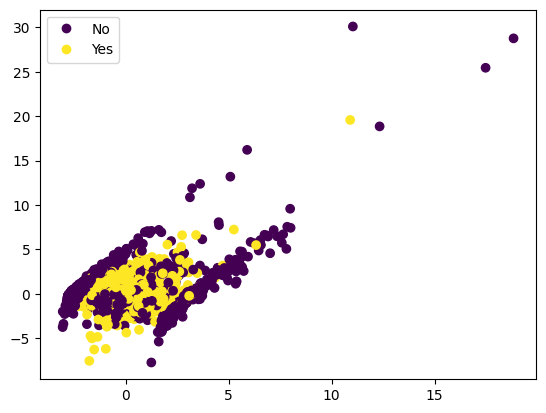

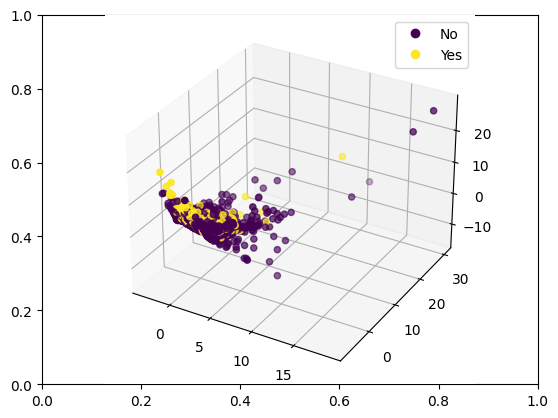

In [27]:
# YOUR CODE HERE
visualize_2pcs( X_reduced, y )

# YOUR CODE HERE
visualize_3pcs( X_reduced, y )


7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [17]:
def train(X, y, standardize = True, pca = False, pcs = 5) -> None:
    # YOUR CODE HERE
    # to avoid data leakage first split before scalings and pca
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale based on Training set values
    if standardize:    
        scaler_train = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler_train.transform(X_train)
        X_test = scaler_train.transform(X_test)

    if pca:
        # Apply PCA
        pca = PCA(n_components=pcs)
        pca = pca.fit(X_train) #fit
        Xpc_train = pca.transform(X_train) # transform
        Xpc_test = pca.transform(X_test)
        
        # Standardize Round #2: Now on PCs
        if standardize:    
            scaler_train = preprocessing.StandardScaler().fit(Xpc_train)
            Xpc_train = scaler_train.transform(Xpc_train)
            Xpc_test = scaler_train.transform(Xpc_test)
    else:
        Xpc_train = X_train
        Xpc_test = X_test
    
    # Create Classifier Model
    clf = LogisticRegression(random_state=0 , class_weight='balanced').fit(Xpc_train, y_train)
        
    # Predict on Training data  
    y_pred = clf.predict(Xpc_test)
    
    print( classification_report(y_test, y_pred) )
    
    

In [18]:
train(X,y)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       659
           1       0.54      0.53      0.54       341

    accuracy                           0.69      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.69      0.69      0.69      1000



Now apply the pipeline on the all the features `X` and review the performance

In [19]:
# YOUR CODE HERE
# PCA := false, so these results should all be the same
for pc_count in [1,5,10 , len(X.columns) ]:
    print( f'Results: {pc_count} Principal Components' )
    train(X, y, standardize = True,  pca = False, pcs = pc_count)


Results: 1 Principal Components
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       659
           1       0.54      0.53      0.54       341

    accuracy                           0.69      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.69      0.69      0.69      1000

Results: 5 Principal Components
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       659
           1       0.54      0.53      0.54       341

    accuracy                           0.69      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.69      0.69      0.69      1000

Results: 10 Principal Components
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       659
           1       0.54      0.53      0.54       341

    accuracy                           0.69      1000
   macro avg       0.65      0.

In [20]:
# Results for No PCA & No standardization
train(X, y, standardize = False,  pca = False, pcs = 0)

              precision    recall  f1-score   support

           0       0.98      0.43      0.60       659
           1       0.47      0.99      0.64       341

    accuracy                           0.62      1000
   macro avg       0.73      0.71      0.62      1000
weighted avg       0.81      0.62      0.61      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [21]:
# YOUR CODE HERE
for pc_count in [1,5,10 , len(X.columns) ]:
    
    print('--------------------------------------------------------------')
    print( f'Results: {pc_count} Principal Components w/o Standardization' )
    train(X, y, standardize = False,  pca = True, pcs = pc_count)
    
    print( f'Results: {pc_count} Principal Components with Standardization' )
    train(X, y, standardize = True,  pca = True, pcs = pc_count)

--------------------------------------------------------------
Results: 1 Principal Components w/o Standardization
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       659
           1       0.62      0.43      0.51       341

    accuracy                           0.72      1000
   macro avg       0.68      0.65      0.65      1000
weighted avg       0.70      0.72      0.70      1000

Results: 1 Principal Components with Standardization
              precision    recall  f1-score   support

           0       0.67      0.52      0.58       659
           1       0.35      0.50      0.41       341

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.56      0.51      0.53      1000

--------------------------------------------------------------
Results: 5 Principal Components w/o Standardization
              precision    recall  f1-score   support

        

8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 

*YOUR ANSWER HERE*
*Potential* Pros
- Obviously, the biggest advantage of using the reduced feature set is that we can continue to hurl pandas-profiler at each new dataframe taht we encounter.
- The reduced data set is easier to visualize & evaluate whether Y varies along some principal components.
- With PCA you have a direct estiamte of the amount of info your losing by dropping each successive PC.

*Potential* Cons
- No garauntee that the outcome will actually move according to the principal components (although we'd hope so)! The covariance structure of the Xs might have little to do with the manifold along which Y-targets vary.
- Loss in direct interpretability of the features. They're now linear combinations of real entitities. Most people aren't tracking the linear transformation in thier heads so they can back-transform into something interpretable. Also, principal components don't have intelligible units of measurement.
- You are losing some information by using a reduced set of features. Although PCA is better that you're keeping the most interpretable information.


## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [22]:
# YOUR CODE HERE
from sklearn.cluster import KMeans


2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [31]:
def visualize_elbow(X, ks , inits = 1):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        
        kmeans = KMeans(n_clusters=k , n_init = inits ) # YOUR CODE HERE
        kmeans.fit(X) # YOUR CODE HERE
        
        inertias.append( kmeans.inertia_ )
        
        
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

(5000, 5)


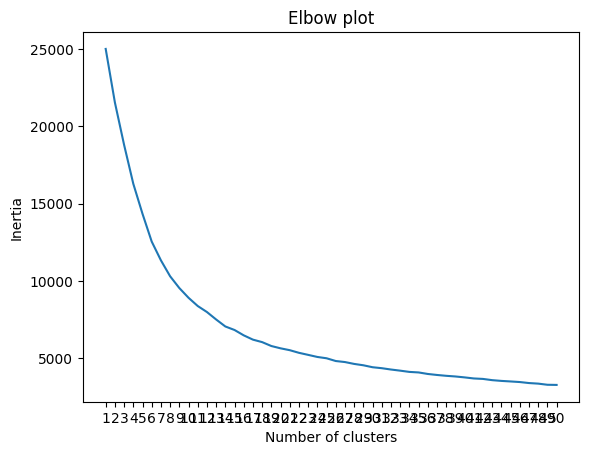

In [36]:
# YOUR CODE HERE

# Recreate the "reduced" data set for clarity
# Original data --> scale it --> PCA --> scale the PCs --> Kmeans

# Scale Orig
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# PCA on Scaled
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled)

# Scale the PCs
scaler = preprocessing.StandardScaler().fit(X_reduced)
X_reduced_scaled = scaler.transform(X_reduced)

print(X_reduced_scaled.shape)

# Elbow plot
visualize_elbow(X_reduced_scaled , np.arange(1,51) , 10 )

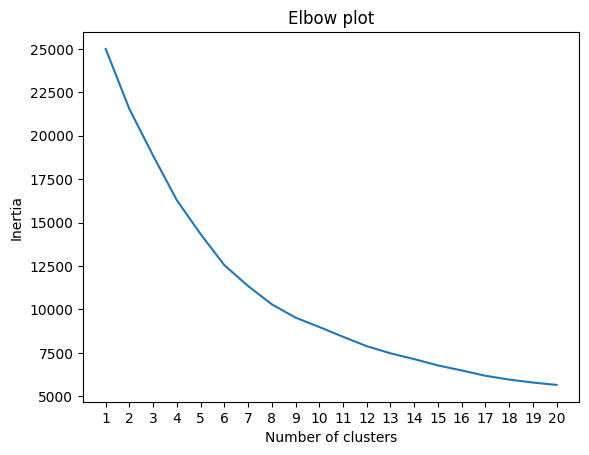

In [38]:
# Elbow plot
visualize_elbow(X_reduced_scaled , np.arange(1,21) , 10 )

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*
- The main disadvantage is that it's subjective, it its own right it doesn't tell you how many clusters to selected.  
    You'd need to determine your own pentaly for model complexity (e.g., number of clusters) to weigh against the reduction in the cost function.  
- Note as well that you can't just take the minimum value because (excepting to randomization/noise) the elbow plot shoudl be monotonically decreasing). Hence the need to apply a penalty to increases in the number of clusters.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [40]:
from utils import visualize_silhouette
from yellowbrick.cluster import silhouette_visualizer


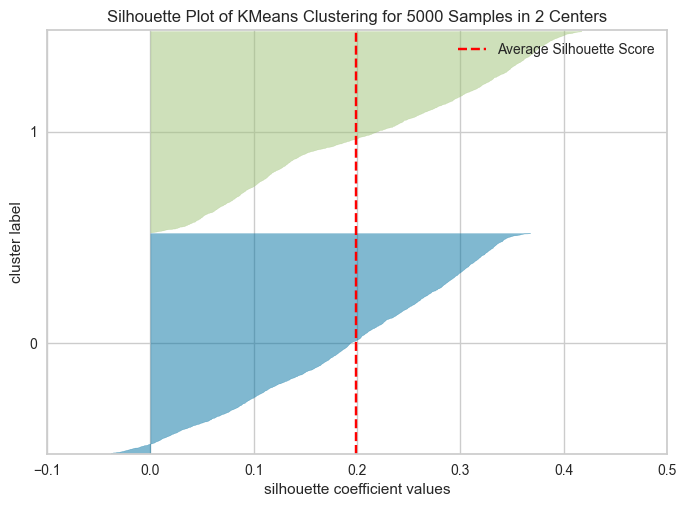

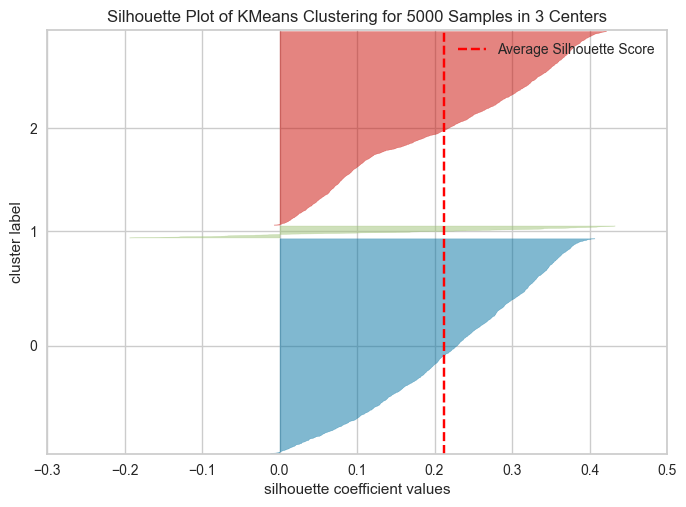

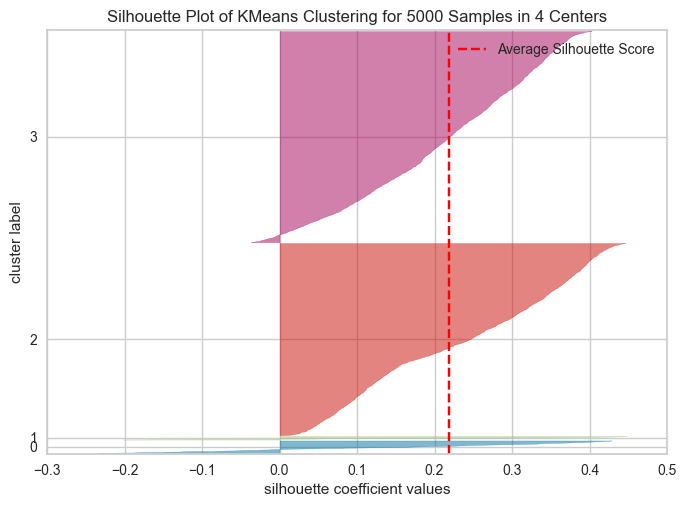

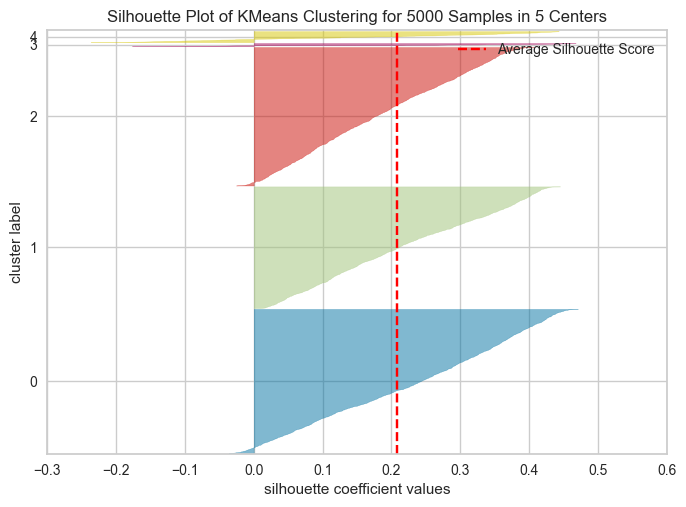

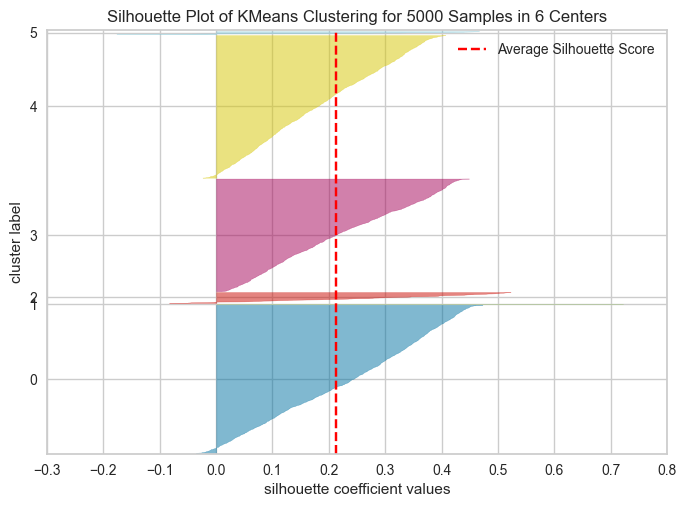

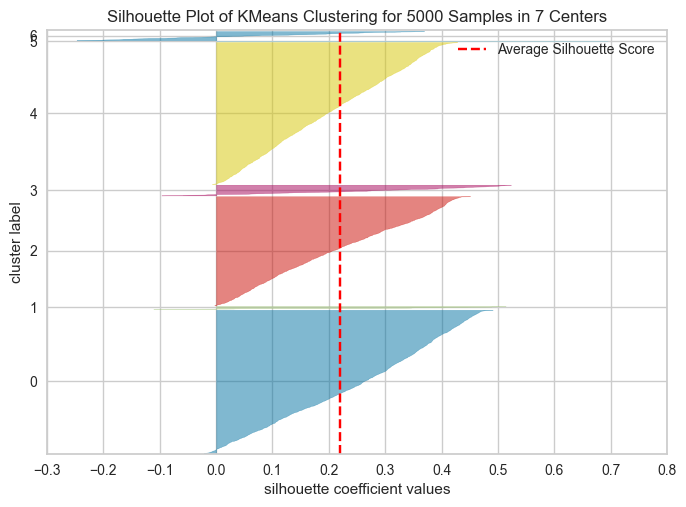

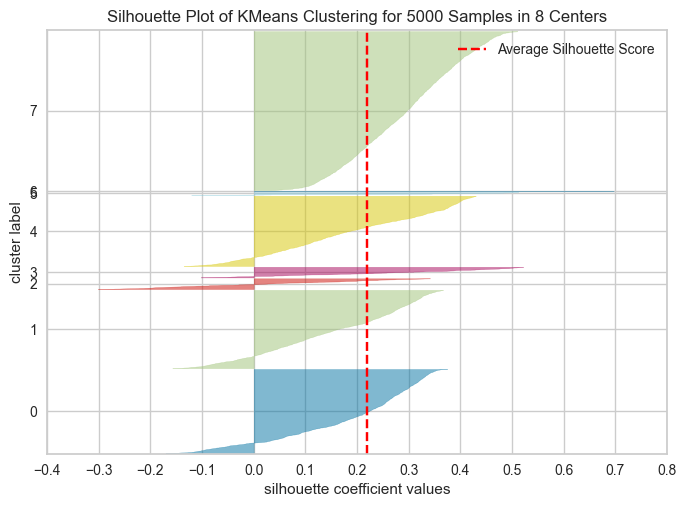

In [56]:
# YOUR CODE HERE
spi = 0
for n_clusters in np.arange(2,9): 
    silhouette_visualizer( KMeans( n_clusters , random_state=42 , n_init = 10), X_reduced_scaled , colors='yellowbrick' )


6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [49]:
# YOUR CODE HERE
km = KMeans(n_clusters= 10 , n_init = 20 ) # YOUR CODE HERE
km.fit( X_reduced_scaled ) # YOUR CODE HERE


KMeans(n_clusters=10, n_init=20)

7. What is the size of each cluster? 

In [55]:
# Observations per cluster

print("Size of each cluster:", pd.DataFrame({"centroid": km.labels_}
                                            ).value_counts().sort_index().sort_values() )

Size of each cluster: centroid
5              3
3             15
7             27
0             63
1            157
4            200
6            826
8            908
2            963
9           1838
dtype: int64


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [62]:
# YOUR CODE HERE
'''
Note: "past" is the original data df.
df_past = pd.read_csv( '../dat/past.csv.gz' )

'''
df_past['pred_labels'] = km.labels_

# Get the reduced data set too for context
df_reduced_scaled_x = pd.DataFrame(X_reduced_scaled , columns = ['C1','C2','C3','C4','C5'])
df_reduced_scaled_x['pred_labels'] = km.labels_


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

    *YOUR ANSWER HERE*

In [79]:
# YOUR CODE HERE
for cluster_i in np.arange(10):
    print(f'\nCluster {cluster_i}')
    display( pd.concat([
    pd.DataFrame(df_past[df_past['pred_labels'] == cluster_i].mean() , columns=['mean']).T ,
    pd.DataFrame(df_past[df_past['pred_labels'] == cluster_i].median() , columns=['median']).T ,
    pd.DataFrame(df_past[df_past['pred_labels'] == cluster_i].std() , columns = ['mode'] ).T ]) )



Cluster 0


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.746797e+06,4.941830e+08,2.408541,1.418972,604195.407067,4.199789,4.004847,0.918405,0.455064,0.986924,...,0.199660,0.085450,0.176455,0.212736,0.166289,0.124074,0.126984,0.035336,1.255026,0.0
median,5.856787e+06,4.976703e+08,2.000000,1.333333,33365.000000,3.490000,3.173333,1.000000,0.400000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
mode,7.296698e+05,6.170501e+07,1.352286,0.471952,971998.351646,3.429890,3.484706,0.674105,0.641359,0.949783,...,0.247216,0.207746,0.297204,0.269264,0.297074,0.284938,0.335630,0.148398,0.739851,0.0



Cluster 1


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.792937e+06,5.049191e+08,5.130498,2.806720,2.211767e+06,5.103495,4.962954,1.517012,1.914788,1.479867,...,0.209388,0.065860,0.121391,0.250374,0.132994,0.134707,0.273885,0.085286,2.098287,1.0
median,5.842840e+06,5.177758e+08,4.500000,2.333333,1.406387e+06,3.970000,3.940000,1.000000,1.500000,1.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0
mode,4.629576e+05,7.008441e+07,2.675145,1.341314,2.326865e+06,5.590738,5.580443,1.299050,1.940938,1.048119,...,0.324418,0.190854,0.245831,0.347789,0.277126,0.282596,0.447378,0.215407,1.166726,0.0



Cluster 2


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.720089e+06,5.404976e+08,1.632067,1.183607,108585.282479,6.457138,6.413372,0.417536,0.854554,0.290581,...,0.232384,0.068891,0.146202,0.255840,0.158333,0.083660,0.129803,0.054689,1.038953,2.0
median,5.860451e+06,5.582251e+08,1.285714,1.000000,13.000000,5.000000,4.950000,0.333333,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
mode,8.346703e+05,7.302037e+07,0.836719,0.335531,422578.199197,5.410963,5.377375,0.449879,0.567656,0.523660,...,0.346987,0.214016,0.278209,0.350274,0.298496,0.221714,0.336261,0.183450,0.245833,0.0



Cluster 3


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.879960e+06,5.106624e+08,4.80000,1.333333,6.946741e+05,6.149000,5.831667,1.233333,0.100000,3.466667,...,0.433333,0.100000,0.066667,0.400000,0.0,0.0,0.0,0.0,1.266667,3.0
median,5.902100e+06,5.318268e+08,2.00000,1.000000,7.100000e+02,5.560000,5.560000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,3.0
mode,4.317055e+04,1.166455e+08,9.82853,0.487950,1.821101e+06,5.198785,5.429769,0.776132,0.280306,9.642663,...,0.495215,0.280306,0.258199,0.507093,0.0,0.0,0.0,0.0,0.703732,0.0



Cluster 4


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.521647e+06,5.368384e+08,1.530937,1.185967,97154.013607,38.619212,38.586438,0.176096,1.207876,0.110317,...,0.222742,0.069241,0.203134,0.207884,0.157958,0.060774,0.370000,0.078268,1.058039,4.0
median,5.863946e+06,5.451081e+08,1.366667,1.000000,107.500000,36.159865,36.159865,0.000000,1.000000,0.000000,...,0.183014,0.000000,0.137335,0.159605,0.000000,0.000000,0.000000,0.000000,1.000000,4.0
mode,1.330839e+06,5.426225e+07,0.667190,0.334002,235015.572263,12.967155,12.953051,0.259639,0.483728,0.250209,...,0.256813,0.162255,0.255966,0.246473,0.233876,0.152885,0.484016,0.168429,0.203293,0.0



Cluster 5


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.885009e+06,5.150258e+08,23.833333,21.666667,3.093390e+06,2.593333,2.433333,0.500000,22.666667,0.666667,...,0.0,0.0,0.0,0.833333,0.0,0.166667,0.333333,0.0,3.5,5.0
median,5.903938e+06,5.265347e+08,24.000000,23.000000,2.997562e+06,1.590000,1.350000,0.000000,24.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,3.5,5.0
mode,3.311736e+04,2.035686e+07,4.252450,7.094599,2.073143e+06,1.737824,1.876388,0.866025,6.110101,1.154701,...,0.0,0.0,0.0,0.288675,0.0,0.288675,0.577350,0.0,0.5,0.0



Cluster 6


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.554545e+06,5.117215e+08,1.652676,1.254297,119588.630015,5.392233,5.368818,0.380309,0.883674,0.295689,...,0.190665,0.054085,0.125354,0.287791,0.179518,0.102108,0.185230,0.060478,1.128006,6.0
median,5.826937e+06,5.281607e+08,1.500000,1.000000,171.500000,4.325000,4.306667,0.333333,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,1.000000,6.0
mode,1.199919e+06,6.704538e+07,0.730892,0.410713,311486.998971,4.403644,4.406047,0.419900,0.532899,0.461424,...,0.294623,0.170728,0.245680,0.348661,0.297698,0.233747,0.388719,0.174221,0.444703,0.0



Cluster 7


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.387167e+06,5.417551e+08,1.429361,1.192694,100929.230924,115.142678,115.075413,0.095532,1.268522,0.037596,...,0.195462,0.095786,0.182948,0.186239,0.163108,0.078102,0.666667,0.098355,1.057200,7.0
median,5.813466e+06,5.453772e+08,1.272727,1.166667,29256.000000,95.220000,95.220000,0.000000,1.222222,0.000000,...,0.175439,0.054299,0.181818,0.192308,0.173913,0.061404,1.000000,0.067873,1.000000,7.0
mode,1.549314e+06,2.824273e+07,0.581024,0.189698,138967.170508,40.185819,40.192392,0.289029,0.212865,0.099740,...,0.151807,0.194521,0.170100,0.156276,0.141244,0.094158,0.480384,0.195835,0.103033,0.0



Cluster 8


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.580308e+06,5.165094e+08,1.928418,1.237397,119782.312362,6.040945,6.024698,0.640463,0.765142,0.422847,...,0.214657,0.082548,0.212742,0.181306,0.177858,0.079539,0.149780,0.051349,1.087297,8.0
median,5.824048e+06,5.350564e+08,1.833333,1.000000,123.250000,4.290000,4.290000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.0
mode,1.131314e+06,6.523085e+07,0.987949,0.401553,358541.081982,5.356199,5.348994,0.729740,0.551279,0.626321,...,0.318687,0.224325,0.321687,0.305073,0.297122,0.216547,0.357052,0.166916,0.389213,0.0



Cluster 9


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,pred_labels
mean,5.483155e+06,5.244100e+08,1.970674,1.333729,275211.575504,4.968482,4.950962,0.575719,0.841250,0.428918,...,0.211422,0.059779,0.162750,0.252192,0.172161,0.079920,0.631665,0.061777,1.153961,9.0
median,5.815645e+06,5.292423e+08,2.000000,1.322479,98454.367857,3.970000,3.970000,0.555556,0.833333,0.383797,...,0.200000,0.000000,0.142857,0.250000,0.158493,0.000000,1.000000,0.000000,1.000000,9.0
mode,1.319657e+06,3.971072e+07,0.610066,0.278302,443589.079710,3.879796,3.867254,0.340321,0.421765,0.371089,...,0.182193,0.103037,0.165601,0.193068,0.164201,0.114482,0.482484,0.104550,0.297404,0.0


In [ ]:
cols = ['C1','C2','C3','C4','C5']
df_reduced_scaled_x

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*

In [ ]:
# YOUR CODE HERE

11. Jot down recommendations or followup steps, detailing the reasons.

    *YOUR ANSWER HERE*

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert new.shape == (30091, 5)

In [ ]:
new.head()

2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [ ]:
# YOUR CODE HERE

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [ ]:
# YOUR CODE HERE # ~.344

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [ ]:
# YOUR CODE HERE

7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [ ]:
# YOUR CODE HERE

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [ ]:
semi_sup_preds = # YOUR CODE HERE

In [ ]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [ ]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [ ]:
print(classification_report(y_test, y_pred))

    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)